# Customer Analysis Case Study

## Activity 1

In [777]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [778]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3 = pd.read_csv('Data/file3.csv')

### Define function to standardise the column names

In [779]:
def convert(file):
    file.columns = file.columns.str.strip().str.lower().str.replace(' ', '_')
    file.rename(columns={'st':'state'}, inplace=True)

In [780]:
convert(file1)
convert(file2)
convert(file3)

<b> Merge files

In [781]:
df = pd.concat([file1,file2,file3], axis=0)

In [782]:
df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


### Clean number of open complaints column

- First compare two duplicate rows with the same customer number to check which value to take from the rows with date format entries

In [783]:
df[df.duplicated(['customer'])]

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1736,FX36546,Washington,M,Master,3679.142115,60804.0,92.0,0,Personal Auto,Four-Door Car,213.225001
1806,WQ89892,Washington,F,College,2607.81554,0.0,70.0,1,Special Auto,Two-Door Car,336.000000
1870,GA49547,Washington,M,High School or Below,5363.076547,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
1883,PQ27923,Washington,M,Master,6333.030812,71737.0,79.0,0,Personal Auto,Two-Door Car,338.795620


In [869]:
df.loc[df.customer == 'GA49547']

AttributeError: 'DataFrame' object has no attribute 'customer'

In [785]:
df.loc[df.customer == 'FX36546']

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
933,FX36546,Washington,M,Master,367914.21%,60804.0,92.0,1/0/00,Personal Auto,Four-Door Car,213.225001
1736,FX36546,Washington,M,Master,3679.142115,60804.0,92.0,0,Personal Auto,Four-Door Car,213.225001


In [786]:
df.loc[df.customer == 'OW15518']

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
91,OW15518,Washington,F,College,1595001.95%,0.0,87.0,1/1/00,Personal Auto,Two-Door Car,46.041452
1924,OW15518,Washington,F,College,15950.01951,0.0,87.0,1,Personal Auto,Two-Door Car,46.041452


- We can see that its the second digit in the date (the third character) that responds to the correct complaint number

In [787]:
df.number_of_open_complaints.value_counts()

0         5629
1/0/00    1626
1          765
2          283
1/1/00     247
3          230
4          119
1/2/00      93
1/3/00      60
5           44
1/4/00      29
1/5/00      12
Name: number_of_open_complaints, dtype: int64

In [788]:
def clean_complaints(x):
    
    """Function converts each value to a string 
    and returns a float of the corresponding value"""
    
    x = str(x)
    if x == x:
        if x == "1/0/00":
            return 0
        if x == "1/1/00":
            return 1
        if x == "1/2/00":
            return 2
        if x == "1/3/00":
            return 3
        if x == "1/4/00":
            return 4
        if x == "1/5/00":
            return 5
        return float(x)
    return x 

In [789]:
df.number_of_open_complaints = df.number_of_open_complaints.apply(clean_complaints)

In [790]:
df.number_of_open_complaints.value_counts()

0.0    7255
1.0    1012
2.0     376
3.0     290
4.0     148
5.0      56
Name: number_of_open_complaints, dtype: int64

<b> Check the column type is now float

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   state                      9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   education                  9137 non-null   object 
 4   customer_lifetime_value    9130 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly_premium_auto       9137 non-null   float64
 7   number_of_open_complaints  9137 non-null   float64
 8   policy_type                9137 non-null   object 
 9   vehicle_class              9137 non-null   object 
 10  total_claim_amount         9137 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.1+ MB


### Drop customer column as we no longer need it and reset indices

In [792]:
df.drop(['customer'], axis=1, inplace=True)

In [793]:
df.reset_index(drop=True, inplace=True)

In [794]:
df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.98798,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


### Clean customer lifetime value column

In [795]:
def clean_clv(x):
    x = str(x)
    if x == x: # If value exists (not null)
        if x.endswith("%"):
            return float(x.rstrip("%"))/100 # Divide by 100 as it is a percent
        return float(x)
    return x 

In [796]:
df.customer_lifetime_value = df.customer_lifetime_value.apply(clean_clv)

<b> Check column type is now float

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer_lifetime_value    9130 non-null   float64
 4   income                     9137 non-null   float64
 5   monthly_premium_auto       9137 non-null   float64
 6   number_of_open_complaints  9137 non-null   float64
 7   policy_type                9137 non-null   object 
 8   vehicle_class              9137 non-null   object 
 9   total_claim_amount         9137 non-null   float64
dtypes: float64(5), object(5)
memory usage: 943.4+ KB


### Cleaning gender column

In [798]:
df.gender.value_counts()

F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [799]:
def clean_gender(x):
    if x in ['M', 'Male']:
        return 'M'
    elif x in ['F', 'female', 'Femal']:
        return 'F'
    else:
        return 'U'

In [800]:
df.gender = df.gender.apply(clean_gender)

In [801]:
df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,U,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6979.535900,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,12887.431700,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7645.861800,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5363.076500,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


### Cleaning state column

In [802]:
df.state.value_counts()

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [803]:
def clean_state(x):
    
    if x in ['Cali', 'California']:
        return 'California'
    elif x in ['WA', 'Washington']:
        return 'Washington'
    elif x == 'AZ':
        return 'Arizona'
    else:
        return x

In [804]:
df.state = df.state.apply(clean_state)

In [805]:
df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,U,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6979.535900,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,12887.431700,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7645.861800,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5363.076500,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [806]:
df.state.value_counts()

California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

### Drop all duplicate rows from the dataframe

In [807]:
df.drop_duplicates(inplace=True)

### Reset indices again since duplicates removed

In [808]:
df.reset_index(drop=True, inplace=True)

In [809]:
df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,U,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,6979.535900,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,12887.431700,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,7645.861800,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,5363.076500,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
8868,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
8869,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
8870,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
8871,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


### Replace null values with mean

In [810]:
round(df.isna().sum()/len(df),4)*100

state                        0.01
gender                       0.00
education                    0.01
customer_lifetime_value      0.09
income                       0.01
monthly_premium_auto         0.01
number_of_open_complaints    0.01
policy_type                  0.01
vehicle_class                0.01
total_claim_amount           0.01
dtype: float64

In [811]:
def replace_null(x):
    
    mean = np.mean(df[x])
    df[x] = df[x].fillna(mean)

<b> Apply to all numeric columns

In [812]:
replace_null("customer_lifetime_value")

In [813]:
replace_null("income")

In [814]:
replace_null("monthly_premium_auto")

In [815]:
replace_null("number_of_open_complaints")

In [816]:
replace_null("total_claim_amount")

<b> All numeric columns now have no null values

In [818]:
round(df.isna().sum()/len(df),4)*100

state                        0.01
gender                       0.00
education                    0.01
customer_lifetime_value      0.00
income                       0.00
monthly_premium_auto         0.00
number_of_open_complaints    0.00
policy_type                  0.01
vehicle_class                0.01
total_claim_amount           0.00
dtype: float64

## Activity 2

### Create new column called region and bin the states into four areas

In [819]:
df['region'] = ""

df.region = df.state.map({'California':'West', 'Oregon':'North West', 'Washington': 'East', 'Arizona':'Central', 'Nevada':'Central'}) 

df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,region
0,Washington,U,Master,7980.711365,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934,East
1,Arizona,F,Bachelor,6979.535900,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935,Central
2,Nevada,F,Bachelor,12887.431700,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247,Central
3,California,M,Bachelor,7645.861800,0.0,106.0,0.0,Corporate Auto,SUV,529.881344,West
4,Washington,M,High School or Below,5363.076500,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323,East
...,...,...,...,...,...,...,...,...,...,...,...
8868,California,M,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764,West
8869,California,F,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000,West
8870,California,M,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983,West
8871,California,M,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000,West


### Make entire dataframe lower case (standardise)

In [821]:
df = df.applymap(lambda x : x.lower() if isinstance(x, str) else x)

In [822]:
df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,region
0,washington,u,master,7980.711365,0.0,1000.0,0.0,personal auto,four-door car,2.704934,east
1,arizona,f,bachelor,6979.535900,0.0,94.0,0.0,personal auto,four-door car,1131.464935,central
2,nevada,f,bachelor,12887.431700,48767.0,108.0,0.0,personal auto,two-door car,566.472247,central
3,california,m,bachelor,7645.861800,0.0,106.0,0.0,corporate auto,suv,529.881344,west
4,washington,m,high school or below,5363.076500,36357.0,68.0,0.0,personal auto,four-door car,17.269323,east
...,...,...,...,...,...,...,...,...,...,...,...
8868,california,m,bachelor,23405.987980,71941.0,73.0,0.0,personal auto,four-door car,198.234764,west
8869,california,f,college,3096.511217,21604.0,79.0,0.0,corporate auto,four-door car,379.200000,west
8870,california,m,bachelor,8163.890428,0.0,85.0,3.0,corporate auto,four-door car,790.784983,west
8871,california,m,college,7524.442436,21941.0,96.0,0.0,personal auto,four-door car,691.200000,west


## Activity 3

<b> Show only the numeric columns

In [824]:
df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,7980.711365,0.0,1000.0,0.0,2.704934
1,6979.535900,0.0,94.0,0.0,1131.464935
2,12887.431700,48767.0,108.0,0.0,566.472247
3,7645.861800,0.0,106.0,0.0,529.881344
4,5363.076500,36357.0,68.0,0.0,17.269323
...,...,...,...,...,...
8868,23405.987980,71941.0,73.0,0.0,198.234764
8869,3096.511217,21604.0,79.0,0.0,379.200000
8870,8163.890428,0.0,85.0,3.0,790.784983
8871,7524.442436,21941.0,96.0,0.0,691.200000


<b> Show only the categorical columns

In [825]:
df.select_dtypes(include=['object'])

,state,gender,education,policy_type,vehicle_class,region
0,washington,u,master,personal auto,four-door car,east
1,arizona,f,bachelor,personal auto,four-door car,central
2,nevada,f,bachelor,personal auto,two-door car,central
3,california,m,bachelor,corporate auto,suv,west
4,washington,m,high school or below,personal auto,four-door car,east
...,...,...,...,...,...,...
8868,california,m,bachelor,personal auto,four-door car,west
8869,california,f,college,corporate auto,four-door car,west
8870,california,m,bachelor,corporate auto,four-door car,west
8871,california,m,college,personal auto,four-door car,west


### Activity 4

<b> Import new data frame

In [878]:
new_df = pd.read_csv('Data/file4.csv')

In [885]:
new_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [882]:
new_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


<b> Create a plot showing the total number of responses

In [828]:
response = new_df["Response"].value_counts()
response

No     8813
Yes    1466
Name: Response, dtype: int64

Text(0.5, 1.0, 'Customer Response Rate')

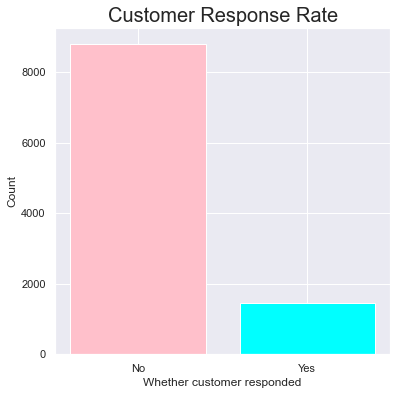

In [850]:
fig,ax = plt.subplots(1,1,figsize=(6,6))

ax.bar(response.index, response, color=("pink","cyan"))
ax.set_xlabel("Whether customer responded")
ax.set_ylabel("Count")
ax.set_xticks([0, 1])
ax.set_title("Customer Response Rate", fontsize=20)

<b> Create a plot to show the response rate by the sales channel

Text(0.5, 1.0, 'Response by Sales Channel')

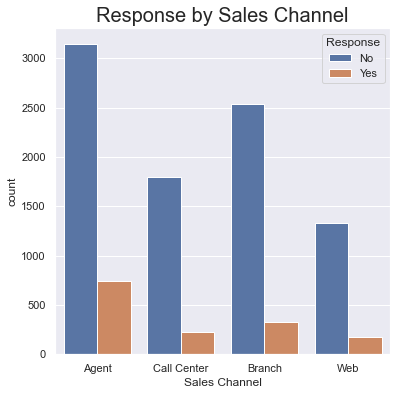

In [849]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Sales Channel", hue="Response", data=new_df)
ax.set_title("Response by Sales Channel", fontsize=20)

#### Plot Response by Total Claim Amount

Text(0.5, 1.0, 'Response by Total Claim Amount')

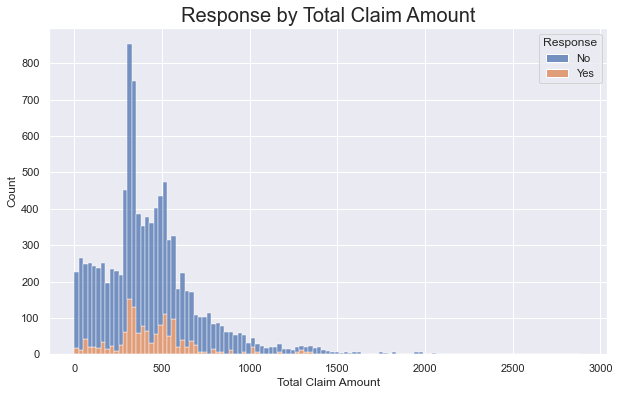

In [845]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=new_df, x="Total Claim Amount", hue="Response", multiple="stack")
ax.set_title("Response by Total Claim Amount", fontsize=20)

In [834]:
new_df["Total Claim Amount"].max()

2893.239678

<b> Plot correlation heatmap

<AxesSubplot:>

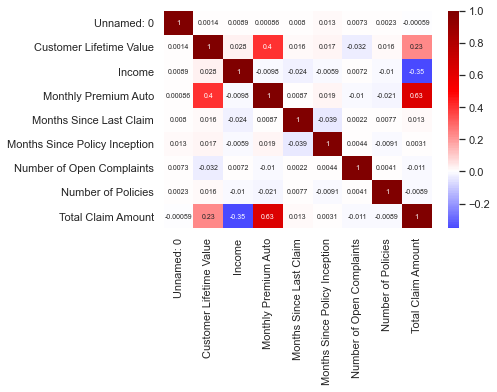

In [844]:
sns.heatmap(corr_matrix,  # the data for the heatmap
            annot=True,  # show the actual values of correlation
            cmap='seismic',  # provide the 'seismic' colormap
            center=0,  # specify the value at which to center the colormap
            annot_kws={"size": 7} # edit box size to make values readable
           )

## Activity 5

In [852]:
np.number

numpy.number

In [862]:
numericals = new_df._get_numeric_data()
numericals

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [863]:
categoricals = new_df.select_dtypes(include=['object'])
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


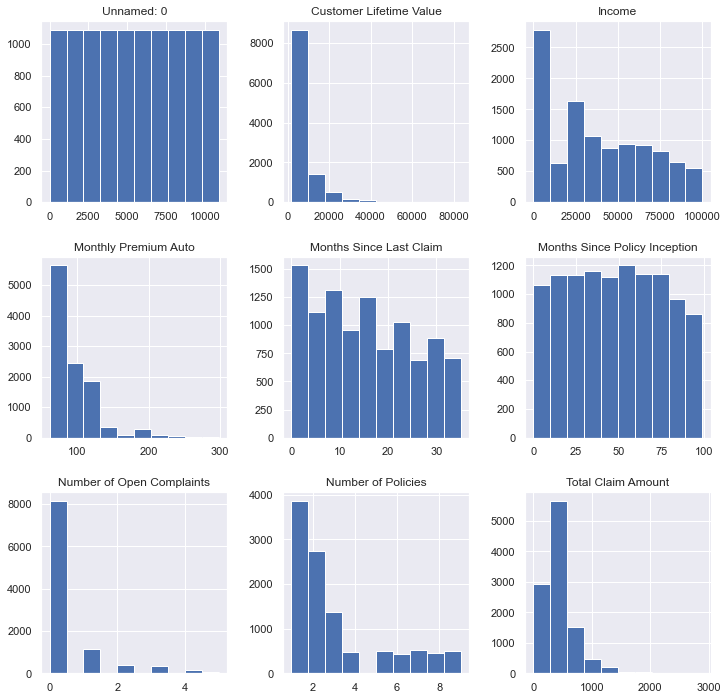

In [870]:
numericals.hist(figsize=(12,12));

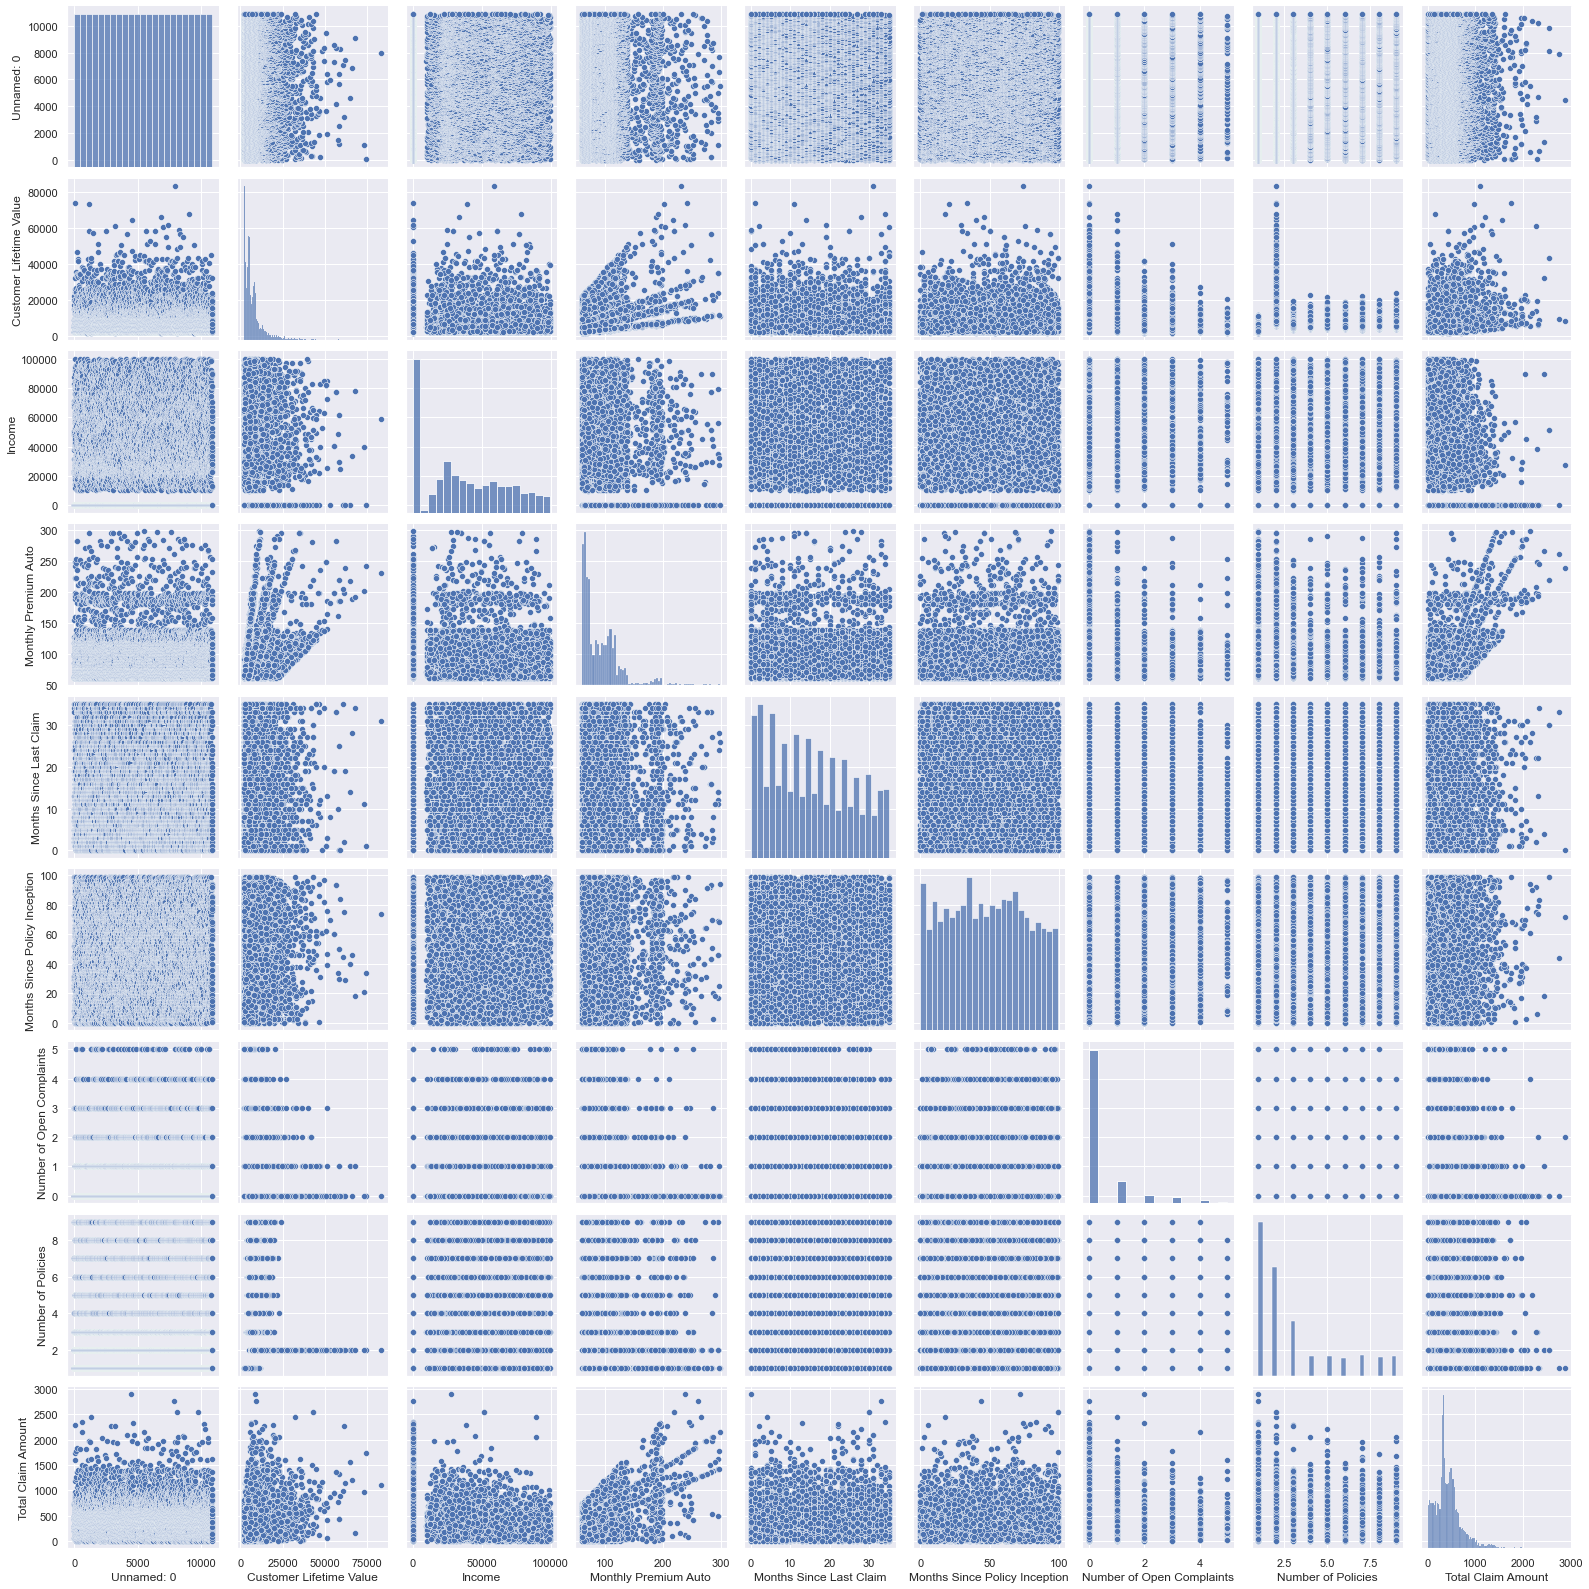

In [875]:
sns.pairplot(numericals);

In [ ]:
#TODO extra
#make columns 2dp
#rearrange columns
#add new graphs
#activity 5
#clean new data a bit